# Aggregation and Grouping

# Planets Data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('C:/Users/91701/Desktop/Dataset/planets.csv')

In [4]:
data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


## <font color='blue'>Simple Aggregation in Pandas

In [5]:
import numpy as np

In [6]:
rng = np.random.RandomState(42)

In [7]:
rng

RandomState(MT19937) at 0x20A93927E40

In [8]:
ser = pd.Series(rng.rand(5))

In [9]:
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [10]:
ser.sum()

2.811925491708157

In [12]:
ser.max()

0.9507143064099162

In [13]:
ser.min()

0.15601864044243652

In [14]:
df = pd.DataFrame({'A':rng.rand(5), 'B':rng.rand(5)})

In [15]:
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [16]:
df.sum()

A    2.389442
B    2.217101
dtype: float64

In [17]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [18]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [19]:
df.mean(axis='rows')

A    0.477888
B    0.443420
dtype: float64

In [20]:
# Dropping rows of missing values

In [22]:
data.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [24]:
data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [23]:
data.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [26]:
data['year'].unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994], dtype=int64)

In [27]:
# Pandas aggregation methods

## <font color='blue'>GroupBy: Split, Apply, Combine

In [28]:
# Split, apply, combine

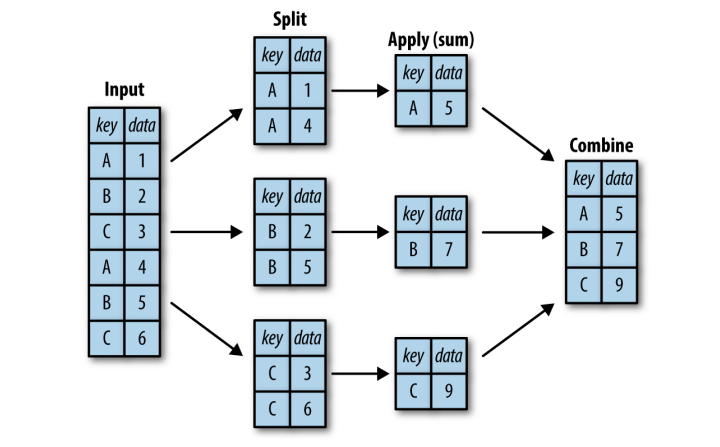

In [29]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data': range(6)}, columns=['key', 'data'])

In [30]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [31]:
df.groupby('key')

In [32]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


## <font color='green'> The GroupBy object

In [43]:
# column indexing

In [33]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [34]:
data.groupby('method')

In [35]:
data.groupby('method')['orbital_period']

In [36]:
data.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [40]:
data['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [41]:
len(data['method'].unique())

10

In [44]:
# Iteration over groups

In [45]:
data.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [48]:
for (method, group) in data.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [49]:
# Dispatch methods

In [51]:
data.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## <font color='blue'> Aggregate, filter, transform, apply

In [52]:
rng = np.random.RandomState(0)

In [53]:
rng

RandomState(MT19937) at 0x20A9990FB40

In [60]:
df = pd.DataFrame({'key':['A','B','C','A','B','C'], 'data1':range(6), 'data2':rng.randint(0,10,6)},)

In [61]:
df

,key,data1,data2
0,A,0,8
1,B,1,8
2,C,2,1
3,A,3,6
4,B,4,7
5,C,5,7


In [69]:
# Aggregation

In [66]:
df.groupby('key').aggregate(['min',np.median,'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     6    7.0   8
B       1    2.5   4     7    7.5   8
C       2    3.5   5     1    4.0   7

In [67]:
df.groupby('key').aggregate([np.min,np.median,np.max])

data1             data2            
     amin median amax  amin median amax
key                                    
A       0    1.5    3     6    7.0    8
B       1    2.5    4     7    7.5    8
C       2    3.5    5     1    4.0    7

In [68]:
df.groupby('key').aggregate({'data1':'min','data2':'max'})

,data1,data2
key,,
A,0,8
B,1,8
C,2,7


In [70]:
# Filtering

In [79]:
def func(x):
    return x['data2'].std() > 4

In [80]:
df

,key,data1,data2
0,A,0,8
1,B,1,8
2,C,2,1
3,A,3,6
4,B,4,7
5,C,5,7


In [81]:
df.groupby('key')

In [82]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,0.707107
C,2.12132,4.242641


In [83]:
df.groupby('key').filter(func)

,key,data1,data2
2,C,2,1
5,C,5,7


In [84]:
# So in key 'C' only we are having more than 4 => 4.24 

In [85]:
# Transformation

In [86]:
df

,key,data1,data2
0,A,0,8
1,B,1,8
2,C,2,1
3,A,3,6
4,B,4,7
5,C,5,7


In [87]:
df.groupby('key').transform(lambda x : x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,0.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,-0.5
5,1.5,3.0


In [88]:
# Apply method

In [89]:
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

In [90]:
df

,key,data1,data2
0,A,0,8
1,B,1,8
2,C,2,1
3,A,3,6
4,B,4,7
5,C,5,7


In [95]:
df.groupby('key',group_keys=True).apply(norm_by_data2)

key     data1  data2
key                       
A   0   A  0.000000      8
    3   A  0.214286      6
B   1   B  0.066667      8
    4   B  0.266667      7
C   2   C  0.250000      1
    5   C  0.625000      7

In [96]:
df.groupby('key',group_keys=False).apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,8
1,B,0.066667,8
2,C,0.250000,1
3,A,0.214286,6
4,B,0.266667,7
5,C,0.625000,7


## Specifying the split key